<h1 align="center"> Group 1 Project</h1>

## Phase 2
 - Tim, Timi, Chris

## Table of Contents:
* [Prerequisites](#1)
* [Dealing with Null Values](#2)
* [More Cleaning](#3)
* [OneHotEncode our categorical values](#4)
* [Finding our Features](#5)
* [Train Test Split our data](#7)
* [Advanced Modeling](#9)
* [Residual Analysis](#10)

## Business Understanding

business stuff

## Data Understanding

data stuff

### Prerequisites <a class="anchor" id="1"></a>

In [1]:
# we start by importing the Python libraries that we will be using:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('seaborn')
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
import datetime

In [2]:
df = pd.read_csv('../data/kc_house_data.csv') # load database

df.head() # show first 5 entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info() # get a summary of the data, seems like id doesn't need to be used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data Processing <a class="anchor" id="2"></a>

Right away it looks like the id column is going to be of no use, let's drop it

In [4]:
df = df.drop(['id'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
df.isna().sum() # Looking at the number of total null values in our dataframe, as seen in our .info()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see 3 total columns with null values, 2 of which have significantly more than the third. The waterfront column has boolean information on if a house is waterfront or not.

The large total number of null values suggest that we should to see if we can fill them in with meaningful data instead of dropping them altogether.

In [6]:
# looking at the first column with null values
df['waterfront'].value_counts() # see how many houses total are waterfronts

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
df['waterfront'] = df['waterfront'].fillna(value='NO') # replace all instances of a null value with NO

In [8]:
df.view.describe() # take a look at the view column

count     21534
unique        5
top        NONE
freq      19422
Name: view, dtype: object

In [9]:
df['view'] = df['view'].fillna(value='NONE') # replace all instances of a null value with NONE

In [10]:
df['yr_renovated'].value_counts() # take a look at the year renovated column

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
df['yr_renovated'] = df['yr_renovated'].fillna(value=0.0) # replace all instances of a null value with 0.0

Important possible categories for our stakeholder, including sqft_basement, are objects, but we need to see if we can get them to a more useful format to use in our analysis.

In [12]:
# sqft_basement is an object while the others are numerical, let's investigate
df['sqft_basement'].unique() # with this we can see all unique entries in this particular column,
                             # maybe a string got entered by accident or something similar

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

There appears to be instances of a question mark which we should remove

In [13]:
df = df[df['sqft_basement'] != '?'] # drop all of the rows that have '?' as their value

In [14]:
df['sqft_basement'] = df['sqft_basement'].astype("float") # convert the remaining values as floats from strings

Date also appears to be an object, let's see about that

In [15]:
df['date'] # see the formatting of our dates

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21143, dtype: object

In [16]:
# we can split the dates up by year, that should be enough for our stakeholder
df['date'] = [x[-4:] for x in df['date']]

df['date'] = df['date'].astype("int64")

In [17]:
df['waterfront'].value_counts()

NO     21001
YES      142
Name: waterfront, dtype: int64

Waterfront appears to be boolean, we should convert it to a string so we can onehotencode it later

In [18]:
df['waterfront'] = df['waterfront'].astype(str) # turn our booleans into strings so we can onehotencode

### Feature Creation

Because location is everything, we will be categorizing our zipcodes to regions so we can get a more accurate model of where the best place to build is.

In [19]:
df['zipcode'].value_counts() # Check zip value counts
ziplist = df['zipcode'] # create zip code list for sorting
ziplist = list(dict.fromkeys(ziplist)) # Pull unique values
ziplist.sort() # Sort list for visibility
pd.DataFrame(ziplist).value_counts() # check to see if our unique elements are intact

98199    1
98040    1
98031    1
98032    1
98033    1
        ..
98092    1
98077    1
98075    1
98074    1
98001    1
Length: 70, dtype: int64

In [20]:
# Load df with Zip codes broken down by Region and City
region_df = pd.read_csv('../Data/ZipCode_Region_City_List.csv')

region_df['Zip'] = region_df['Zip'].str.replace(',', '') # Clean Zip column
region_df['Zip'] = region_df['Zip'].str.replace(' ', '')

region_df # Verify

,Zip,Region,City
0,98001,S,Auburn
1,98002,S,Auburn
2,98003,S,Federal Way
3,98004,W,Bellevue
4,98005,W,Bellevue
...,...,...,...
65,98177,SeaN,Seattle
66,98178,SeaS,Seattle
67,98188,SeaS,Seattle
68,98198,SeaS,Seattle


In [21]:
# King County 

# South
South_zips = region_df['Zip'][(region_df['Region'] == 'S')].astype(int)
South_zips_list = South_zips.tolist()

# North
North_zips = region_df['Zip'][(region_df['Region'] == 'N')].astype(int)
North_zips_list = North_zips.tolist()

# East
East_zips = region_df['Zip'][(region_df['Region'] == 'E')].astype(int)
East_zips_list = East_zips.tolist()

# West
West_zips = region_df['Zip'][(region_df['Region'] == 'W')].astype(int)
West_zips_list = West_zips.tolist()


# Seattle

# South
Sea_South_zips = region_df['Zip'][(region_df['Region'] == 'SeaS')].astype(int)
Sea_South_zips_list = Sea_South_zips.tolist()

# North
Sea_North_zips = region_df['Zip'][(region_df['Region'] == 'SeaN')].astype(int)
Sea_North_zips_list = Sea_North_zips.tolist()

# East
Sea_East_zips = region_df['Zip'][(region_df['Region'] == 'SeaE')].astype(int)
Sea_East_zips_list = Sea_East_zips.tolist()

# West
Sea_West_zips = region_df['Zip'][(region_df['Region'] == 'SeaW')].astype(int)
Sea_West_zips_list = Sea_West_zips.tolist()

# Verify a couple results
print(North_zips_list)
print(South_zips_list)

[98011, 98019, 98028, 98033, 98034, 98052, 98053, 98072, 98074, 98075, 98077]
[98001, 98002, 98003, 98010, 98022, 98023, 98030, 98031, 98032, 98042, 98092]


In [22]:
region_list = df['zipcode'].tolist()
region_append_list = [] # initialize blank list for our categorical data
for zipcode in region_list: # for loop to append appropriate labels to zipcodes so we can encode it later on
        if zipcode in South_zips_list:
            region_append_list.append('South')
        elif zipcode in North_zips_list:
            region_append_list.append('North')
        elif zipcode in East_zips_list:
            region_append_list.append('East')
        elif zipcode in West_zips_list:
            region_append_list.append('West')
        elif zipcode in Sea_West_zips_list:
            region_append_list.append('West')
        elif zipcode in Sea_North_zips_list:
            region_append_list.append('North')
        elif zipcode in Sea_South_zips_list:
            region_append_list.append('South')
        elif zipcode in Sea_East_zips_list:
            region_append_list.append('East')
        else:
            continue

In [23]:
region_append_list2 = []

for zipcode in region_list: # for loop to append appropriate labels to zipcodes so we can encode it later on
        if zipcode in South_zips_list:
            region_append_list2.append('NO')
        elif zipcode in North_zips_list:
            region_append_list2.append('NO')
        elif zipcode in East_zips_list:
            region_append_list2.append('NO')
        elif zipcode in West_zips_list:
            region_append_list2.append('NO')
        elif zipcode in Sea_West_zips_list:
            region_append_list2.append('YES')
        elif zipcode in Sea_North_zips_list:
            region_append_list2.append('YES')
        elif zipcode in Sea_South_zips_list:
            region_append_list2.append('YES')
        elif zipcode in Sea_East_zips_list:
            region_append_list2.append('YES')
        else:
            continue

In [24]:
# Cast zipcode col from Dataframe as a list for future comparison
reg = len(region_list)
print(f"Our region list is {reg} entries long.") # check to see if our new list is the same size as our existing dataframe
print(df.count())

Our region list is 21143 entries long.
date             21143
price            21143
bedrooms         21143
bathrooms        21143
sqft_living      21143
sqft_lot         21143
floors           21143
waterfront       21143
view             21143
condition        21143
grade            21143
sqft_above       21143
sqft_basement    21143
yr_built         21143
yr_renovated     21143
zipcode          21143
lat              21143
long             21143
sqft_living15    21143
sqft_lot15       21143
dtype: int64


In [25]:
df['region'] = region_append_list # create columns for our new features
df['in_sea'] = region_append_list2
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,region,in_sea
0,2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,South,YES
1,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,North,YES
2,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,North,NO
3,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,West,YES
4,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,North,NO


### OneHotEncode our categorical values <a class="anchor" id="4"></a>

We should check the status of our columns

In [26]:
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['waterfront'].value_counts())
print(df['region'].value_counts())
print(df['in_sea'].value_counts())

NONE         19079
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64
Average      13726
Good          5557
Very Good     1666
Fair           166
Poor            28
Name: condition, dtype: int64
7 Average        8788
8 Good           5933
9 Better         2557
6 Low Average    1997
10 Very Good     1112
11 Excellent      391
5 Fair            235
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NO     21001
YES      142
Name: waterfront, dtype: int64
North    7581
South    5775
West     5090
East     2697
Name: region, dtype: int64
NO     12259
YES     8884
Name: in_sea, dtype: int64


Because our data is both ranked and categorical, we will need to use OrdinalEncode and OneHotEncode

In [27]:
df_enc = df.copy() # initialize new dataframe to work with
oe = OrdinalEncoder() # initialize OE
ohe = OneHotEncoder(sparse=False) # initialize OHE

df_enc['view'] = oe.fit_transform(df_enc[['view']]) # ordinally encode our view data
df_enc['condition'] = oe.fit_transform(df_enc[['condition']]) # ordinally encode our condition data
df_enc['grade'] = oe.fit_transform(df_enc[['grade']]) # ordinally encode our grade data
df_enc['region'] = oe.fit_transform(df_enc[['region']]) # ordinally encode our region data
df_enc['waterfront'] = ohe.fit_transform(df_enc[['waterfront']]) # onehotencode our waterfront data
df_enc['in_sea'] = ohe.fit_transform(df_enc[['in_sea']]) # onehotencode our waterfront data

In [28]:
print(df_enc.view.value_counts()) # print out newly encoded categories
print(df_enc.condition.value_counts())
print(df_enc.grade.value_counts())
print(df_enc.waterfront.value_counts())
print(df_enc.region.value_counts())
print(df_enc.in_sea.value_counts())

4.0    19079
0.0      930
3.0      496
2.0      327
1.0      311
Name: view, dtype: int64
0.0    13726
2.0     5557
4.0     1666
1.0      166
3.0       28
Name: condition, dtype: int64
8.0     8788
9.0     5933
10.0    2557
7.0     1997
0.0     1112
1.0      391
6.0      235
2.0       89
5.0       27
3.0       13
4.0        1
Name: grade, dtype: int64
1.0    21001
0.0      142
Name: waterfront, dtype: int64
1.0    7581
2.0    5775
3.0    5090
0.0    2697
Name: region, dtype: int64
1.0    12259
0.0     8884
Name: in_sea, dtype: int64


Now all of our categorical data is represented numerically and can be included in our model!

In [29]:
df_enc.info() # confirm our encoding was successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21143 non-null  int64  
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  float64
 8   view           21143 non-null  float64
 9   condition      21143 non-null  float64
 10  grade          21143 non-null  float64
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

---
### SUCCESS! Now we have a clean dataset to work with

---

### Finding our features <a class="anchor" id="5"></a>

''

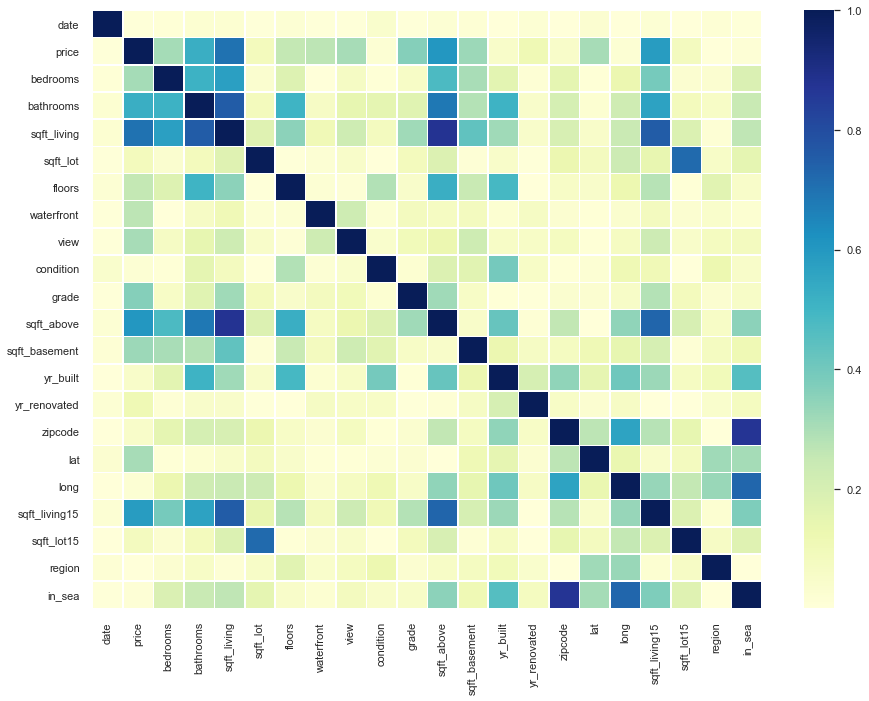

In [30]:
sns.set(rc={'figure.figsize':(15, 11)})
sns.heatmap(df_enc.corr().abs(), cmap="YlGnBu", linewidths=.5) # run a heatmap to detect possible collinearity
;

There are some areas of interest and possible multicollinearity in several of our columns, indicated by the darker regions on the above heatmap. Date appears to have almost no collinearity at all, suggesting no real significant impact on a houses price.

In [31]:
df_enc.describe() # scan our new data for outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,region,in_sea
count,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,...,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000,21143.000000,21143.000000
mean,2014.323417,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.993284,3.725536,0.852670,...,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967,1.627063,0.579814
std,0.467791,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,0.919889,1.266833,...,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663,0.985142,0.493600
min,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000,0.000000,0.000000
25%,2014.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1.000000,4.000000,0.000000,...,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000,1.000000,0.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1.000000,4.000000,0.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000,2.000000,1.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,1.000000,4.000000,2.000000,...,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000,2.000000,1.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000,3.000000,1.000000


In [32]:
# one of our houses appears to have 33 bedrooms, since this is a relevant column for our holders let's look into that
df_enc['bedrooms'].sort_values(ascending = False).head()

15856    33
8748     11
15147    10
19239    10
13301    10
Name: bedrooms, dtype: int64

In [33]:
df_enc.loc[[15856]] # inspect our first outlier

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,region,in_sea
15856,2014,640000.0,33,1.75,1620,6000,1.0,1.0,4.0,4.0,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,1.0,0.0


The amount of bedrooms appears to betray the square footing on this property. The others at 11 and 10 make sense due to the wealthiness of this counties inhabitants.

In [34]:
# it would seem safe to drop our highest outlier in this case
df_enc = df_enc[df_enc.bedrooms <= 11] # drop the outlier row

For the purpose of our stakeholder's needs, we will select 'sqft_living', 'bathrooms','sqft_above', 'bedrooms', 'grade', and our own 'region' column, as they are very relevant features of a new house when looking to build, and they show a decent level of multicollinearity with the price of houses.

### Train Test Split <a class="anchor" id="7"></a>

In [35]:
# set both variables for our TT split
X = df_enc.copy().drop(columns='price')
y = df_enc['price']

# perform TT split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [36]:
ss = StandardScaler() # initialize scaler
ss.fit(X_train) # fit the scaler

#transform both the train and test and set them as objects
X_train_scale = ss.transform(X_train)
X_test_scale = ss.transform(X_test)

In [37]:
X_train_scale = pd.DataFrame(X_train_scale) # Turn our scaled data into a pandas dataframe
X_train_scale.columns = df.drop('price', axis=1).columns # keep our original columns
y_train.reset_index(drop=True, inplace=True) # make sure our indexes line up

In [38]:
# now do the same for our test data
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = df.drop('price', axis=1).columns
y_test.reset_index(drop=True, inplace=True)

In [39]:
# and get our unscaled data as well
X_train.reset_index(drop=True,inplace=True)

In [40]:
df_train_scale = pd.concat([X_train_scale, y_train], axis=1) # join both train and test into respective dataframes
df_test_scale = pd.concat([X_test_scale, y_test], axis=1)    # keeping our dependent variable (price)
X_train_final = pd.concat((X_train,y_train),axis=1)

### Making Base Model

In [41]:
model1 = DummyRegressor(strategy='mean', constant=df_train_scale['price'].mean()) # get a dummy prediction mean

model1

DummyRegressor(constant=540631.1560929463)

Our Predicted average for price of a house in King County is $540,708, which is a good starting point. Now let's run an OLS model on the columns we determined earlier were most important.

### OLS <a class="anchor" id="9"></a>

In [42]:
formula = f'price ~ bathrooms+bedrooms+sqft_living+sqft_above+region+in_sea+grade' # initialize our formula
formula2='price ~' + ' + '.join(df_train_scale.columns.drop('price'))
model = ols(formula,df_train_scale).fit() # run an ols on our trained data and fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     3066.
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:07:09   Log-Likelihood:            -2.3386e+05
No. Observations:               16913   AIC:                         4.677e+05
Df Residuals:                   16905   BIC:                         4.678e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.406e+05   1883.382    287.053      0.000    5.37e+05    5.44e+05
bathrooms    1.938e+04   2957.011      6.553      0.000    1.36e+04    2.52e+04
bedrooms    -4.678e+04   2418.602    -19.340      0.000   -5.15e+04    -4.2e+04
sqft_living  2.731e+05   4665.497     58.543      0.000    2.64e+05    2.82e+05
sqft_above   -623.2164   4124.246     -0.151      0.880   -8707.168    7460.736
region       5220.8151   1902.361      2.744      0.006    1491.989    8949.641
in_sea      -6.395e+04   2036.100    -31.407      0.000   -6.79e+04      -6e+04
grade       -5.381e+04   2036.129    -26.428      0.000   -5.78e+04   -4.98e+04
==============================================================================
Omnibus:                    11035.791   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           401685.862
Skew:                           2.616   Prob(JB):                         0.00
Kurtosis:                      26.295   Cond. No.                         5.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Retrieving Unscaled, Train Dataset Coefficients

model_unscaled = ols(formula,X_train_final).fit()
unscaled_coeff= pd.DataFrame(model_unscaled.params)
unscaled_coeff.rename({0:'Input Variables Impact on Home Prices'},axis=1,inplace=True)
unscaled_coeff.drop(['Intercept'],inplace=True)
unscaled_coeff['Input Variables Impact on Home Prices'] =  unscaled_coeff['Input Variables Impact on Home Prices'].map(round)

unscaled_coeff

,Input Variables Impact on Home Prices
bathrooms,25080
bedrooms,-51655
sqft_living,296
sqft_above,-1
region,5298
in_sea,-129387
grade,-23145


## Residual Analysis/Validations <a class="anchor" id="10"></a>

In [44]:
y_prediction = model.predict(df_test_scale) # create a prediction to test R2 of our test data
print('Rsquared of test model:', r2_score(y_test,y_prediction))

Rsquared of test model: 0.5431658405240027


In [45]:
y_hat = model.predict(X_train_scale) # initialize our y-hat for our residual analysis

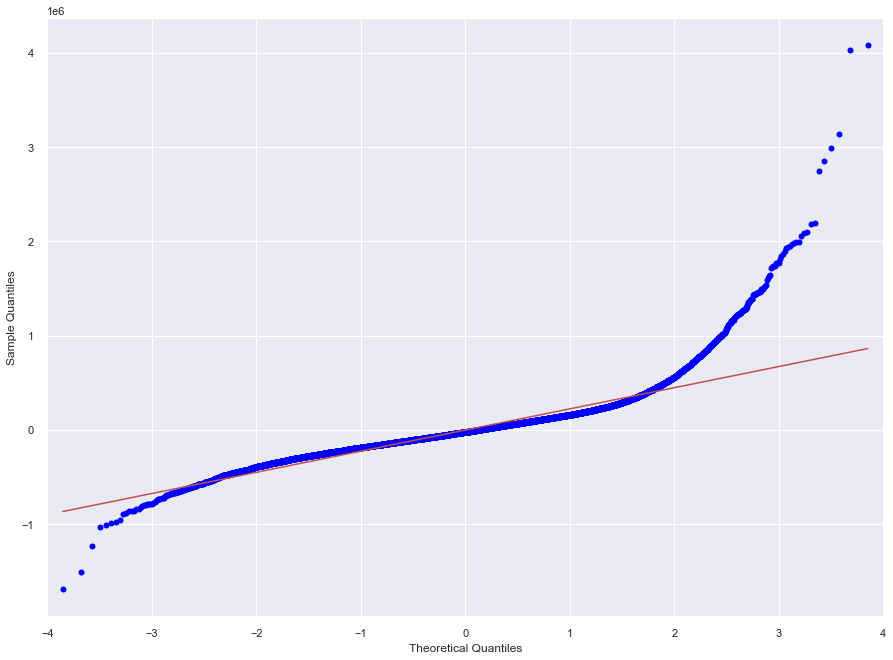

In [46]:
qqplot(y_train-y_hat,line='r') # run a qqplot to look at the distribution of our residuals
plt.show()

### Heteroskedasticity

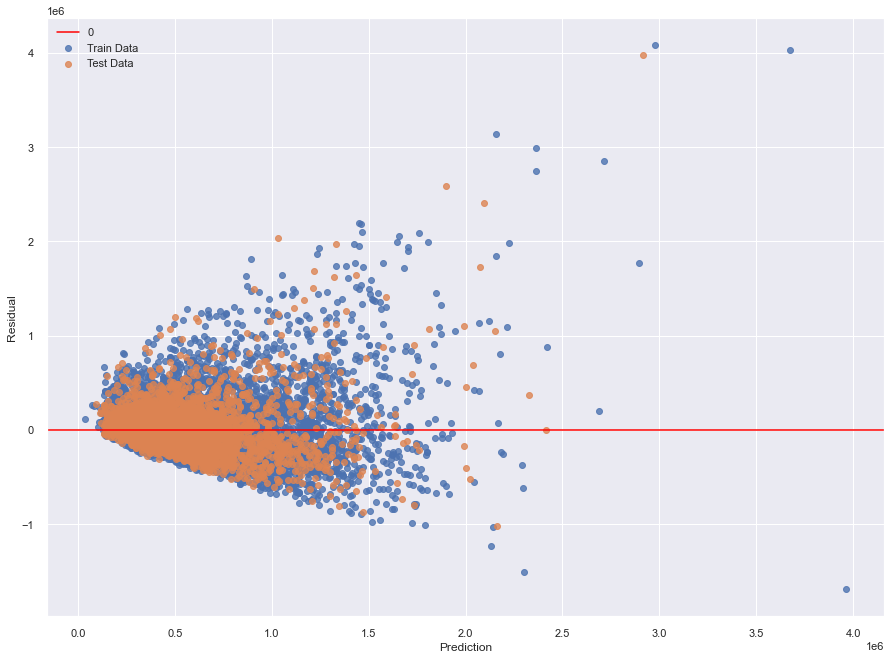

In [47]:
plt.scatter(y_hat, y_train - y_hat, label='Train Data', alpha = 0.8)
plt.scatter(y_prediction, y_test - y_prediction, label='Test Data', alpha = 0.8)

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.legend()
plt.show()

### Looking for normal distribution in our selected variables

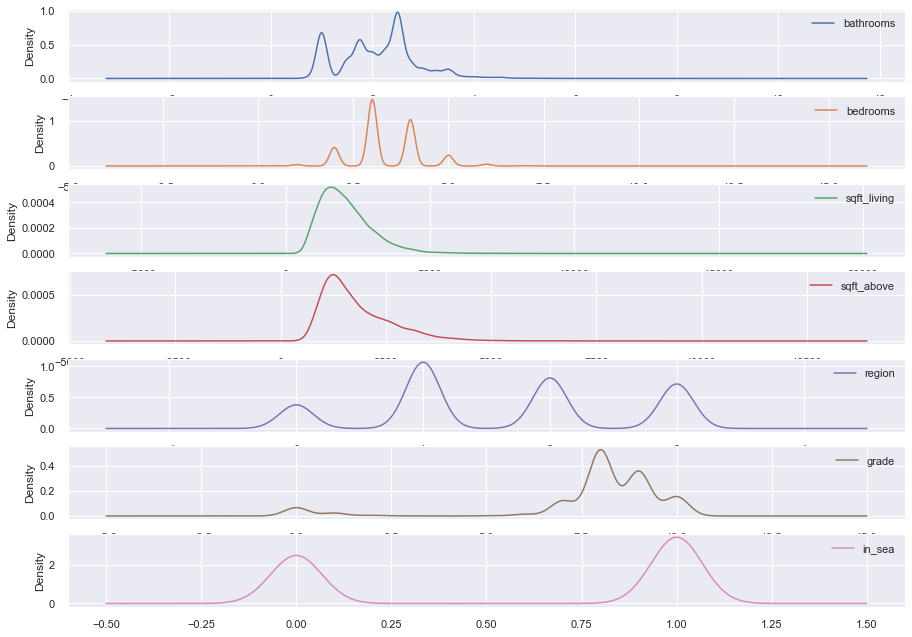

In [48]:
df_enc.filter(items=["bathrooms","bedrooms","sqft_living","sqft_above","region","grade", "in_sea"], axis=1).plot.kde(subplots=True, sharex=False)
plt.rcParams['figure.figsize'] = 16,6
plt.show()

Our two numerical features have a normal distribution, as do our categoricals. They are spread out because they can only exist in one category at a time, but the distributions are very good.